<a href="https://colab.research.google.com/github/SebastianPareiss/MCI-MSE_Aufgaben/blob/main/SQL_Hausaufgabe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hausaufgabe 4 - Skript mit SQL-Befehlen**

Da es in meinem Visual Studio Code Probleme mit einem Befehl gibt (siehe Bild) und ich deshalb meinen Code nicht laufen lassen kann, habe ich für die Abgabe  Hausaufgabe 4 wie besprochen dieses Colab erstellt. 
Hier können meine einzelnen Aufgaben angeschaut und ausgeführt werden. 

Ich habe die Aufgabenstellung (Textzeilen) aus der Angabe kopiert und dann in eine entsprechende Zeile in Colab eingefügt.
Auch das file "test_data.csv" habe ich ins Colab hochgeladen und anschließend ausgeführt, um die Werte für den Code zu haben.
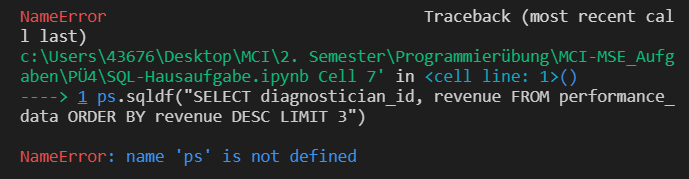

In [24]:
# Installiert Paket, damit man SQL-Befehle auf Dataframes anwenden kann
!pip install pandasql

# Lädt Paket, damit man Dataframes (Tabellen in Python) anwenden kann
import pandas as pd
# Lädt Paket, damit man SQL-Befehle auf Dataframes anwenden kann
import pandasql as ps

In [25]:
#Befehl um hochgeladenes file abzurufen
pd.read_csv("/test_data.csv")


,Unnamed: 0,VO2_max,age,smoker,height,weight,revenue,diagnostician_id,gender
0,0,45,66,True,165,76,30,2,Male
1,1,37,58,False,180,87,32,1,Female
2,2,54,27,False,155,62,29,0,Male
3,3,58,32,False,183,78,26,0,Male
4,4,45,75,True,166,101,10,2,Female
...,...,...,...,...,...,...,...,...,...
195,195,55,24,True,160,74,11,3,Male
196,196,46,17,False,172,92,18,3,Male
197,197,61,52,False,164,84,29,0,Female
198,198,67,46,True,164,78,39,1,Male


In [26]:
# Lösung
# Lade die Daten in einen pandas Dataframe namens "performance_data"
performance_data = pd.read_csv("/test_data.csv")

# Zeige performance_data an
performance_data


,Unnamed: 0,VO2_max,age,smoker,height,weight,revenue,diagnostician_id,gender
0,0,45,66,True,165,76,30,2,Male
1,1,37,58,False,180,87,32,1,Female
2,2,54,27,False,155,62,29,0,Male
3,3,58,32,False,183,78,26,0,Male
4,4,45,75,True,166,101,10,2,Female
...,...,...,...,...,...,...,...,...,...
195,195,55,24,True,160,74,11,3,Male
196,196,46,17,False,172,92,18,3,Male
197,197,61,52,False,164,84,29,0,Female
198,198,67,46,True,164,78,39,1,Male


**AUFGABEN**

1. Was sind die höchsten drei Erlöse, die erzielt wurden?

In [27]:
ps.sqldf("SELECT diagnostician_id, revenue FROM performance_data ORDER BY revenue DESC LIMIT 3")

,diagnostician_id,revenue
0,1,49
1,3,49
2,2,49


2. Was sind die höchsten drei Erlöse, die mit Nicht-Rauchern erzielt wurden?

In [28]:
ps.sqldf("SELECT age, smoker, revenue FROM performance_data WHERE smoker=0 ORDER BY revenue DESC LIMIT 3")

,age,smoker,revenue
0,88,0,49
1,32,0,48
2,61,0,47


3. Wie leistungsfähig sind Personen mit Gewicht über 80kg verglichen mit leichteren Personen? (2 Befehle)

In [29]:
b1 = ps.sqldf("SELECT AVG(VO2_max), AVG(weight) FROM performance_data WHERE weight > 80")

b2 = ps.sqldf("SELECT AVG(VO2_max), AVG(weight) FROM performance_data WHERE weight < 80")

print(b1)
print(b2)

   AVG(VO2_max)  AVG(weight)
0     49.839623    95.660377
   AVG(VO2_max)  AVG(weight)
0     48.170455    68.965909


4. Was ist die Durchschnittsleistung von Frauen über 170cm?

In [32]:
ps.sqldf("SELECT AVG(VO2_max), AVG(height), gender FROM performance_data WHERE height > 170 AND gender='Female'")


,AVG(VO2_max),AVG(height),gender
0,47.390244,179.170732,Female


5. Wie viel Umsatz haben die einzelnen Diagnostiker:innen erzielt?

In [19]:
ps.sqldf("SELECT SUM(revenue) FROM performance_data GROUP BY diagnostician_id")

,SUM(revenue)
0,1012
1,1494
2,1562
3,1708


6. Wie ist die durchschnittliche Leistung von Rauchern und Nicht-Rauchern, die von den Diagnostiker:innen 0 und 1 betreut wurden.

In [22]:
df_diagnostic_0 = ps.sqldf("SELECT AVG(VO2_max), diagnostician_id, smoker FROM performance_data WHERE diagnostician_id=0 GROUP BY smoker")

df_diagnostic_1 = ps.sqldf("SELECT AVG(VO2_max), diagnostician_id, smoker FROM performance_data WHERE diagnostician_id=1 GROUP BY smoker")

print(df_diagnostic_0)
print(df_diagnostic_1)

   AVG(VO2_max)  diagnostician_id  smoker
0     48.789474                 0       0
1     51.647059                 0       1
   AVG(VO2_max)  diagnostician_id  smoker
0        49.375                 1       0
1        48.000                 1       1
